# Physics-Informed Neural Networks: A Partial Differential Equations Solver

In [ ]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots  # optional, requires latex
import numpy as np


results_folder = '../results/II_PINNs'  
if not os.path.exists(results_folder):
    os.makedirs(results_folder)

# --- Figure settings ---
save_fig = True
if save_fig:
    mpl.rcParams['pgf.texsystem'] = 'pdflatex'

title_font_size = 8
axes_font_size = 6
text_width = 4.72441 # 120mm in inches
plotting_factor = 3
font_factor = 1
fig_factor = 1

plt.style.use(['science', 'grid'])

plt.rcParams.update({
    "font.size": axes_font_size*font_factor,
    "figure.titlesize": title_font_size*font_factor,
    "axes.titlesize": title_font_size*font_factor,
    "lines.linewidth": 2/plotting_factor,    # plot lines
    "lines.markersize": 4/plotting_factor,      # markers
    "axes.linewidth": 0.8/plotting_factor,      # axes border
    "xtick.major.width": 0.8/plotting_factor,   # x tick width
    "ytick.major.width": 0.8/plotting_factor,   # y tick width
    "xtick.minor.width": 0.6/plotting_factor,   # x minor tick width
    "ytick.minor.width": 0.6/plotting_factor,   # y minor tick width
    "xtick.major.size": 3.5/plotting_factor,    # x tick length
    "ytick.major.size": 3.5/plotting_factor,    # y tick length
    "xtick.minor.size": 2/plotting_factor,      # x minor tick length
    "ytick.minor.size": 2/plotting_factor,      # y minor tick length
    "grid.linewidth": 0.6/plotting_factor,      # grid lines
})

## Introduction

In [2]:
import requests
import time

def fetch_count_for_year(year, query_terms, sleep_secs=1.0):
    """
    Query OpenAlex for number of works published in given year
    whose title matches any of the query_terms.
    """
    url = "https://api.openalex.org/works"
    total = 0
    for term in query_terms:
        # Filter by publication year and title search
        params = {
            "filter": f"publication_year:{year},title.search:{term}",
            "per_page": 1  # only need meta
        }
        resp = requests.get(url, params=params)
        resp.raise_for_status()
        data = resp.json()
        count = data.get("meta", {}).get("count", 0)
        total += count
        time.sleep(sleep_secs)
    return total


# Define orthographic variants of the phrase to tolerate small differences
query_terms = [
    "Physics-Informed Neural Networks",
    "Physics Informed Neural Networks",
    "Physics-Informed Neural Network",
    "Physics Informed Neural Network",
    "PINNs",
    "Physics–Informed Neural Networks"
]
years = list(range(2018, 2026))  # up to current year (2025)
counts = []
for y in years:
    try:
        c = fetch_count_for_year(y, query_terms)
        print(f"Year {y}: {c}")
    except Exception as e:
        print(f"Error for year {y}: {e}")
        c = None
    counts.append(c)

Year 2018: 30
Year 2019: 144
Year 2020: 577
Year 2021: 1442
Year 2022: 3099
Year 2023: 5511
Year 2024: 8656
Year 2025: 10183


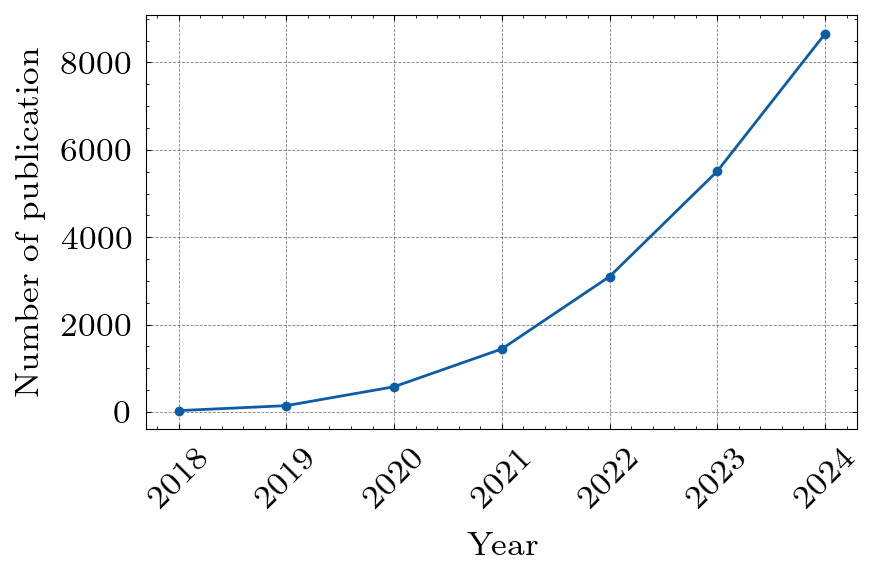

Fig width: 3.0, set it to 3.00 < 6.34 (A4 with margins) in latex to have a printed font size of 8.00 for titles and 6.00 for the axis
Saved: results/II_PINNs/images/PINNs_publications_by_year.pgf/png


In [8]:
# Plot the results
fig = plt.figure(figsize=(3,2), dpi=300)
plt.plot(years[:-1], counts[:-1], marker='o')
# plt.title("Number of publications with 'Physics-Informed Neural Networks' in title (by year)")
plt.xlabel("Year", fontsize=8)
plt.ylabel("Number of publication", fontsize=8)
plt.grid(True)
plt.xticks(years[:-1], rotation=45)
plt.tick_params(labelsize=8)
plt.tight_layout()
plt.show()
print(f"Fig width: {fig.get_figwidth()}, set it to {fig.get_figwidth()/font_factor:.2f} < 6.34 (A4 with margins) in latex to have a printed font size of {title_font_size:.2f} for titles and {axes_font_size:.2f} for the axis")

images_folder = os.path.join(results_folder, 'images')
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

if save_fig:
    fig.savefig(os.path.join(images_folder, 'pgf', 'PINNs_publications_by_year.pgf'), bbox_inches='tight')
    fig.savefig(os.path.join(images_folder, 'PINNs_publications_by_year.png'), dpi=300, bbox_inches='tight')
    print(f"Saved: {os.path.join(images_folder, 'PINNs_publications_by_year.pgf/png')}")

## Activation Functions

Common activation functions used in neural networks for PINNs.

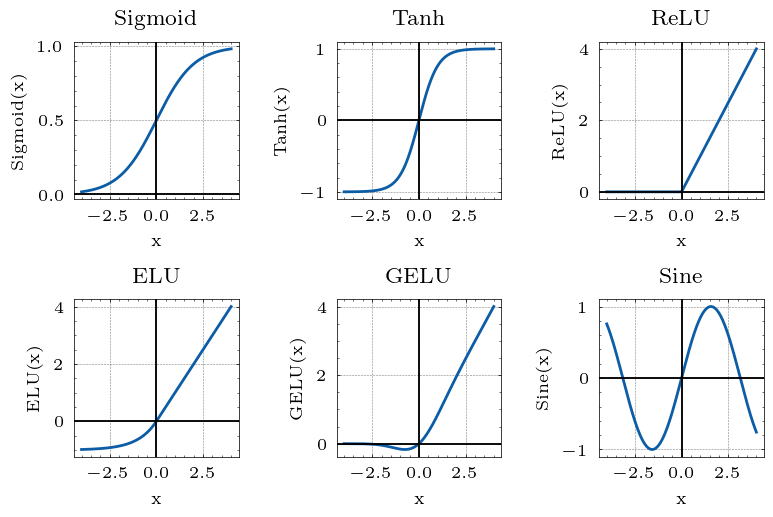

Fig width: 4.0, set it to 4.00 < 6.34 (A4 with margins) in latex to have a printed font size of 8.00 for titles and 6.00 for the axis
Saved: results/II_PINNs/images/activation_functions.png/pgf
Saved: results/II_PINNs/images/activation_functions.png/pgf


In [64]:

import numpy as np

# Define x range for plotting
x = np.linspace(-4, 4, 1000)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def sine_activation(x):
    return np.sin(x)

# Plot all activation functions
fig_width = 4 # in inches
fig, axes = plt.subplots(2, 3, figsize=(fig_width, fig_width*2/3), dpi=200)
axes = axes.flatten()

activations = [
    ('Sigmoid', sigmoid(x)),
    ('Tanh', tanh(x)),
    ('ReLU', relu(x)),
    # ('Leaky ReLU', leaky_relu(x)),
    ('ELU', elu(x)),
    # ('Swish', swish(x)),
    ('GELU', gelu(x)),
    ('Sine', sine_activation(x)),
]

for idx, (name, y) in enumerate(activations):
    axes[idx].plot(x, y, linewidth=3.0/plotting_factor)
    axes[idx].set_title(name)
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel(f'{name}(x)')
    axes[idx].grid(True)
    axes[idx].axhline(y=0, color='k')
    axes[idx].axvline(x=0, color='k')

# Remove the last empty subplot
# axes[-1].axis('off')

plt.tight_layout()
plt.show()

print(f"Fig width: {fig.get_figwidth()}, set it to {fig.get_figwidth()/fig_factor:.2f} < 6.34 (A4 with margins) in latex to have a printed font size of {title_font_size:.2f} for titles and {axes_font_size:.2f} for the axis")

# Save the figure
images_folder = os.path.join(results_folder, 'images')
if save_fig:
    fig.savefig(os.path.join(images_folder, 'activation_functions.png'), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(images_folder, 'pgf', 'activation_functions.pgf'), bbox_inches='tight')
    print(f"Saved: {os.path.join(images_folder, 'activation_functions.png/pgf')}")


# JAX implementation

## Primitive operations

In [27]:
import importlib
# from jax import core
from jax._src import core

# List of key internal modules where primitives are defined
modules = [
    "jax._src.lax.lax",
    "jax._src.lax.linalg",
    "jax._src.lax.slicing",
    "jax._src.lax.reduction",
    "jax._src.lax.control_flow",
    "jax._src.lax.fft",
    "jax._src.lax.operators",
]

all_primitives = {}

for modname in modules:
    try:
        mod = importlib.import_module(modname)
        primitives = {
            name: obj
            for name, obj in vars(mod).items()
            if isinstance(obj, core.Primitive)
        }
        all_primitives[modname.split(".")[-1]] = sorted(p.name for p in primitives.values())
    except ModuleNotFoundError:
        pass

# Print nicely grouped
print("-------------------------")
print("JAX Primitive Operations:")
print("-------------------------")
for group, prims in all_primitives.items():
    print(f"\n🔹 {group.upper()} ({len(prims)} primitives)")
    print(", ".join(prims))

-------------------------
JAX Primitive Operations:
-------------------------

🔹 LAX (96 primitives)
abs, acos, acosh, add, after_all, and, argmax, argmin, asin, asinh, atan, atan2, atanh, bitcast_convert_type, broadcast_in_dim, cbrt, ceil, clamp, clz, complex, concatenate, conj, convert_element_type, copy, cos, cosh, create_token, div, dot_general, empty, eq, eq_to, exp, exp2, expm1, floor, ge, gt, imag, infeed, integer_pow, iota, is_finite, le, le_to, log, log1p, logistic, lt, lt_to, max, min, mul, ne, neg, nextafter, not, or, outfeed, pad, population_count, pow, real, reduce, reduce_and, reduce_max, reduce_min, reduce_or, reduce_precision, reduce_prod, reduce_sum, reduce_xor, rem, reshape, rev, rng_bit_generator, rng_uniform, round, rsqrt, select_n, shift_left, shift_right_arithmetic, shift_right_logical, sign, sin, sinh, sort, sqrt, squeeze, sub, tan, tanh, tie, top_k, transpose, xor

🔹 LINALG (15 primitives)
cholesky, eig, eigh, eigh_jacobi, geqrf, hessenberg, householder_product,

## Computationnal graph

{ lambda ; a:f32[]. let
    b:f32[] = sin a
    c:f32[] = integer_pow[y=2] a
    d:f32[] = exp c
    e:f32[] = mul b d
  in (e,) }


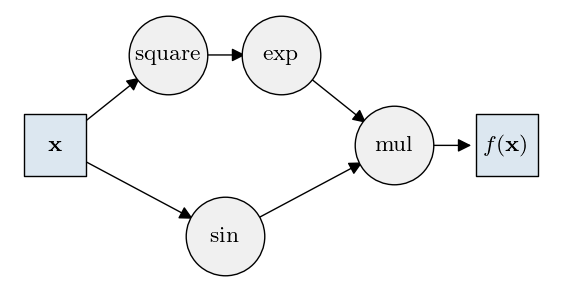

Fig width: 3.5, set it to 3.50 < 6.34 (A4 with margins) in latex to have a printed font size of 8.00 for titles and 6.00 for the axis
Saved: results/II_PINNs/images/jaxpr_computation_graph.png/pgf
Saved: results/II_PINNs/images/jaxpr_computation_graph.png/pgf


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import jax
import jax.numpy as jnp

# Define our function
def f(x):
    return jnp.sin(x) * jnp.exp(x**2)

# 1️⃣  Trace the function with JAX
x0 = 1.0
jaxpr = jax.make_jaxpr(f)(x0)
print(jaxpr)

# Node layout and types
pos = {r"$\mathbf{x}$": (0, 0), 
       "square": (0.5, 0.4), 
       "exp": (1.0, 0.4),
       "sin": (0.75, -0.4), 
       "mul": (1.5, 0), 
       r"$f(\mathbf{x})$": (2.0, 0)}

types = {r"$\mathbf{x}$": "io", "square": "op", "exp": "op",
         "sin": "op", "mul": "op", r"$f(\mathbf{x})$": "io"}

edges = [(r"$\mathbf{x}$","square"),("square","exp"),
         (r"$\mathbf{x}$","sin"),("sin","mul"),("exp","mul"),("mul",r"$f(\mathbf{x})$")]

# Style dictionaries
colors = {"io": "#DCE7F0", "op": "#F0F0F0"}
shapes = {"io": "s", "op": "o"}
sizes  = {"io": 500, "op": 800}

# Plot
fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=200)
for n,(x,y) in pos.items():
    t = types[n]
    ax.scatter(x,y,s=sizes[t],c=colors[t],edgecolors="black",
               marker=shapes[t],zorder=2,linewidths=0.5)
    ax.text(x,y,n,ha="center",va="center",fontsize=8)
for s,e in edges:
    ax.add_patch(FancyArrowPatch(pos[s],pos[e],arrowstyle='-|>',color='black',
                                 linewidth=0.5,shrinkA=10,shrinkB=13,mutation_scale=10))
ax.set(xlim=(-0.2,2.2),ylim=(-0.6,0.6),aspect="equal"); ax.axis("off")
plt.show()

print(f"Fig width: {fig.get_figwidth()}, set it to {fig.get_figwidth()/fig_factor:.2f} < 6.34 (A4 with margins) in latex to have a printed font size of {title_font_size:.2f} for titles and {axes_font_size:.2f} for the axis")

# Save the figure
images_folder = os.path.join(results_folder, 'images')
if save_fig:
    fig.savefig(os.path.join(images_folder, 'jaxpr_computation_graph.png'), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(images_folder, 'pgf', 'jaxpr_computation_graph.pgf'), bbox_inches='tight')
    print(f"Saved: {os.path.join(images_folder, 'jaxpr_computation_graph.png/pgf')}")

## JIT compilation to optimize performance

Non-jitted: 0.091s
First jit (compile): 0.445s
Subsequent jit: 0.006s
Speed-up: 14.8×
GPU jit: 0.002s
Speed-up GPU: 57.4×
GPU jit: 0.002s
Speed-up GPU: 57.4×


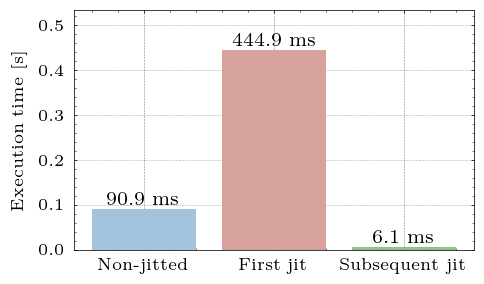

Saved: results/II_PINNs/images/jax_jit_performance.png/pgf


In [66]:
import jax, jax.numpy as jnp
import numpy as np, timeit, matplotlib.pyplot as plt

# --- Function ---
def f(x):
    for _ in range(100):
        x = jnp.sin(x) * jnp.exp(-x**2)
    return x

x = jnp.linspace(-5, 5, 100_000)

def time_run(fn, n=3):
    t = []
    for _ in range(n):
        s = timeit.default_timer()
        fn(x).block_until_ready()
        t.append(timeit.default_timer() - s)
    return np.median(t)

# --- Warm-up ---
with jax.default_device(jax.devices("cpu")[0]):
    f(x).block_until_ready()

# --- CPU timings ---
with jax.default_device(jax.devices("cpu")[0]):
    f_jit = jax.jit(f)
    t_nonjit = time_run(f)
    t_first = time_run(lambda x=x: jax.jit(f)(x), n=1)  # includes compile
    f_jit(x).block_until_ready()
    t_jitted = time_run(f_jit)

print(f"Non-jitted: {t_nonjit:.3f}s\n"
      f"First jit (compile): {t_first:.3f}s\n"
      f"Subsequent jit: {t_jitted:.3f}s\n"
      f"Speed-up: {t_nonjit/t_jitted:.1f}×")

labels = ["Non-jitted", "First jit", "Subsequent jit"]
times = [t_nonjit, t_first, t_jitted]
colors = ["#A2C3DB", "#D7A29E", "#8FBF88"]

# --- Optional GPU ---
gpu = next((d for d in jax.devices() if "nvidia" in d.device_kind.lower() or "gpu" in d.device_kind.lower()), None)
t_gpu = None
if gpu:
    with jax.default_device(gpu):
        f_jit_gpu = jax.jit(f)
        f_jit_gpu(x).block_until_ready()
        t_gpu = time_run(f_jit_gpu)
    print(f"GPU jit: {t_gpu:.3f}s")
    print(f"Speed-up GPU: {t_nonjit/t_gpu:.1f}×")


# --- Plot ---
fig, ax = plt.subplots(figsize=(2.5, 1.5), dpi=200)
bars = ax.bar(labels, times, color=colors)

# --- Labels ---
for lbl, val, bar in zip(labels, times, bars):
    x, y = bar.get_x() + bar.get_width()/2, bar.get_height()
    ax.text(x, y+0.02, f"{val*1000:.1f} ms", ha="center", va="center", fontsize=7)

ax.set_ylabel("Execution time [s]")
ax.set_ylim(0, max(times + ([t_gpu] if t_gpu else [])) * 1.2)
ax.grid(axis="y", linestyle=":", alpha=0.6)
fig.tight_layout()
plt.show()

if save_fig:
    images_folder = os.path.join(results_folder, 'images')
    fig.savefig(os.path.join(images_folder, 'jax_jit_performance.png'), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(images_folder, 'pgf', 'jax_jit_performance.pgf'), bbox_inches='tight')
    print(f"Saved: {os.path.join(images_folder, 'jax_jit_performance.png/pgf')}")


## PINN Implementation: Solving the Poisson Equation

Solving the 1D Poisson equation:
$$-\frac{d^2u}{dx^2} = f(x), \quad x \in [0,1]$$

with boundary conditions $u(0) = u(1) = 0$ and manufactured solution $u(x) = \sin(\pi x)$, giving $f(x) = \pi^2 \sin(\pi x)$.

In [2]:
import jax
import jax.numpy as jnp
from jax import grad # gradient function using Autodiff

# Manufactured solution and source term
u_exact = lambda x: jnp.sin(jnp.pi * x)
f_source = lambda x: jnp.pi**2 * jnp.sin(jnp.pi * x)

# Initialize parameters
key = jax.random.PRNGKey(0) # random seed
scale = jnp.sqrt(2.0 / (1 + 32))
W1 = scale * jax.random.normal(key, (1, 32)); b1 = jnp.zeros(32)
W2 = scale * jax.random.normal(key, (32, 1)); b2 = jnp.zeros(1)
theta = (W1, b1, W2, b2) # Initial parameters

def u_tilde(x, theta): # Neural network approximation
    W1, b1, W2, b2 = theta
    return (jnp.tanh(jnp.array([x]) @ W1 + b1) @ W2 + b2)[0]

du_dx = lambda x, theta: grad(u_tilde)(x, theta) # first derivative
d2u_dx2 = lambda x, theta: grad(du_dx)(x, theta) # second derivative

import optax
from jax import jit, vmap # map functions over arrays

def loss_fn(theta, x_pde, x_bc, u_bc):
    L_pde_func = lambda x: (-d2u_dx2(x, theta) - f_source(x))**2
    L_bc_func = lambda x: (u_tilde(x, theta) - u_bc)**2
    L_pde = jnp.mean(vmap(L_pde_func)(x_pde)) # mapped over x_pde
    L_bc  = jnp.mean(vmap(L_bc_func)(x_bc)) # mapped over x_bc
    return L_pde + L_bc

optimizer = optax.adam(1e-3) # Adam optimizer with learning rate 1e-3
opt_state = optimizer.init(theta) 

@jit # JIT compile the training step
def train_step(theta, opt_state, x_pde, x_bc, u_bc):
    loss_val, grads = jax.value_and_grad(loss_fn)(theta, x_pde, x_bc, u_bc) 
    updates, opt_state = optimizer.update(grads, opt_state)
    theta = optax.apply_updates(theta, updates)
    return theta, opt_state, loss_val

# N_pde = 100
# x_pde = jax.random.uniform(key, (N_pde,)) # Collocation points
# x_bc = jnp.array([0.0, 1.0]) # Boundary points
# u_bc = vmap(u_exact)(x_bc) # Exact boundary values (0, 0)
# for epoch in range(10_001):
#     theta, opt_state, loss_val = train_step(theta, opt_state,x_pde, x_bc, u_bc)
#     if epoch % 1000 == 0:
#         print(f"Epoch {epoch:5d}| Loss: {loss_val:.4e}")

In [3]:
# Collocation and test points
N_pde = 100
x_pde = jax.random.uniform(key, (N_pde,))
x_bc = jnp.array([0.0, 1.0])
u_bc = vmap(u_exact)(x_bc)
x_test = jnp.linspace(0, 1, 100)
u_test_exact = vmap(u_exact)(x_test)
history = {'Epoch': [], 'Loss': [], 'L2 Error': [], 'Solution': []}
n_epochs = 10_001
for epoch in range(n_epochs):
    theta, opt_state, loss_val = train_step(theta, opt_state,x_pde, x_bc, u_bc)
    if epoch % 25 == 0:
        u_pred = vmap(lambda x: u_tilde(x, theta))(x_test)
        l2_error = jnp.sqrt(jnp.mean((u_pred - u_test_exact)**2))
        history['Epoch'].append(epoch)
        history['Loss'].append(loss_val)
        history['L2 Error'].append(l2_error)
        history['Solution'].append(u_pred)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch:5d}| Loss: {loss_val:.4e}| L2 Error: {l2_error:.4e}")

Epoch     0| Loss: 4.7239e+01| L2 Error: 9.2381e-01
Epoch  1000| Loss: 9.6209e-01| L2 Error: 4.6871e-02
Epoch  2000| Loss: 1.7456e-01| L2 Error: 5.3600e-02
Epoch  3000| Loss: 5.9793e-02| L2 Error: 1.6716e-02
Epoch  4000| Loss: 2.6636e-02| L2 Error: 1.0971e-02
Epoch  5000| Loss: 1.2141e-02| L2 Error: 6.2093e-03
Epoch  6000| Loss: 5.1962e-03| L2 Error: 3.3981e-03
Epoch  7000| Loss: 2.5317e-03| L2 Error: 1.6112e-03
Epoch  8000| Loss: 1.5013e-03| L2 Error: 1.6143e-03
Epoch  9000| Loss: 9.6939e-04| L2 Error: 8.4209e-04
Epoch 10000| Loss: 7.1391e-04| L2 Error: 6.5627e-04


## Results

/tmp/ipykernel_14390/2120637374.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f'{i//1000}k' for i in np.arange(0, n_epochs+1, 2000)])


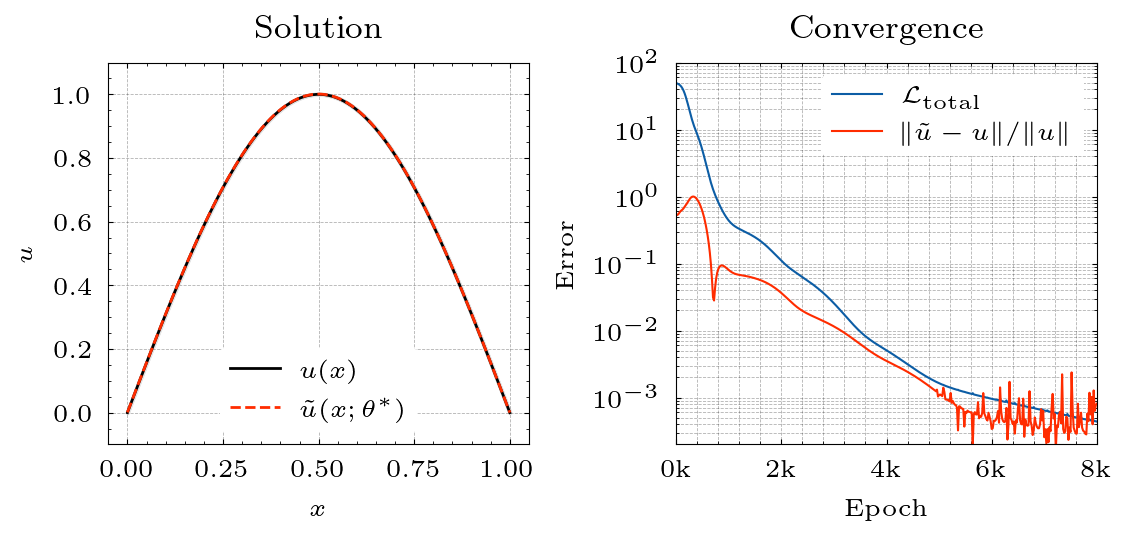

In [ ]:
# Animate training: evolution of ũ(x;θ) during epochs
from matplotlib.animation import FuncAnimation
from itertools import chain


def init_figure(theta_str="\\theta"):
    """Initialize figure and static plot elements."""
    fig, axes = plt.subplots(1, 2, figsize=(text_width*0.9, text_width*0.35), dpi=300)
    fig.subplots_adjust(wspace=0.35)
    
    # LEFT: Solution plot setup
    axes[0].plot(x_test, u_test_exact, 'k-', linewidth=2/plotting_factor, label=r'$u(x)$')
    line_pred, = axes[0].plot([], [], 'C3--', linewidth=2/plotting_factor, label=r"$\tilde{u}(x;"+f"{theta_str})$")
    axes[0].set_xlabel(r'$x$'); axes[0].set_ylabel(r'$u$'); axes[0].set_ylim([-0.1, 1.1])
    axes[0].set_title('Solution'); axes[0].legend(edgecolor='none')
    axes[0].grid(True, alpha=0.3)
    epoch_text = axes[0].text(0.035, 0.965, '', transform=axes[0].transAxes, fontsize=5,
                              va='top', ha='left', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0))
    
    # RIGHT: Convergence plot setup
    line_loss, = axes[1].semilogy([], [], '-', label=r'$\mathcal{L}_{\mathrm{total}}$', 
                                   color='C0', linewidth=1.5/plotting_factor)
    line_l2, = axes[1].semilogy([], [], '-', label=r'$\|\tilde{u}-u\|/\|u\|$',
                                color='C3', linewidth=1.5/plotting_factor)
    axes[1].set_xlabel('Epoch'); axes[1].set_ylabel('Error')
    axes[1].set_xlim([0, n_epochs]); axes[1].set_ylim([2e-4, 1e2])
    axes[1].set_title('Convergence'); axes[1].legend(edgecolor='none')
    axes[1].grid(True, alpha=0.3, which='both')
    # axes[1].set_xticks(np.arange(0, n_epochs+1, 2000))
    axes[1].set_xticklabels([f'{i//1000}k' for i in np.arange(0, n_epochs+1, 2000)])
    
    return fig, axes, {'line_pred': line_pred, 'line_loss': line_loss, 'line_l2': line_l2, 
                       'epoch_text': epoch_text, 'fill_obj': None}

def update_plot(frame_idx, artists):
    """Update plot with data from given frame index."""
    u_frame = history['Solution'][frame_idx]
    epoch_frame = history['Epoch'][frame_idx]
    
    # Update solution and error fill
    artists['line_pred'].set_data(x_test, u_frame)
    if artists['fill_obj'] is not None:
        artists['fill_obj'].remove()
    artists['fill_obj'] = artists['line_pred'].axes.fill_between(x_test, u_test_exact, u_frame, 
                                                                   alpha=0.2, color='gray')
    
    # Update epoch text
    artists['epoch_text'].set_text(f"Epoch: {(epoch_frame + 1) / 1000:.1f}k")
    
    # Update convergence curves
    epochs_subset = np.array(history['Epoch'][:frame_idx+1])
    artists['line_loss'].set_data(epochs_subset, np.array(history['Loss'][:frame_idx+1]))
    artists['line_l2'].set_data(epochs_subset, np.array(history['L2 Error'][:frame_idx+1]))

    return artists['line_pred'], artists['epoch_text'], artists['line_loss'], artists['line_l2'], artists['fill_obj']

# Static plot for saving
fig_static, axes_static, artists_static = init_figure("\\theta^*")
update_plot(len(history['Epoch']) - 1, artists_static)
artists_static['epoch_text'].set_text('')
plt.show()

if save_fig:
    fig_static.savefig(os.path.join(results_folder, 'images', 'pinn_poisson_1d.png'), dpi=300, bbox_inches='tight')
    fig_static.savefig(os.path.join(results_folder, 'images', 'pinn_poisson_1d.pgf'), bbox_inches='tight')
    print(f"Saved: {os.path.join(results_folder, 'images', 'pinn_poisson_1d.png/pgf')}")

Animation: 129 frames at 10 fps = 12.9s


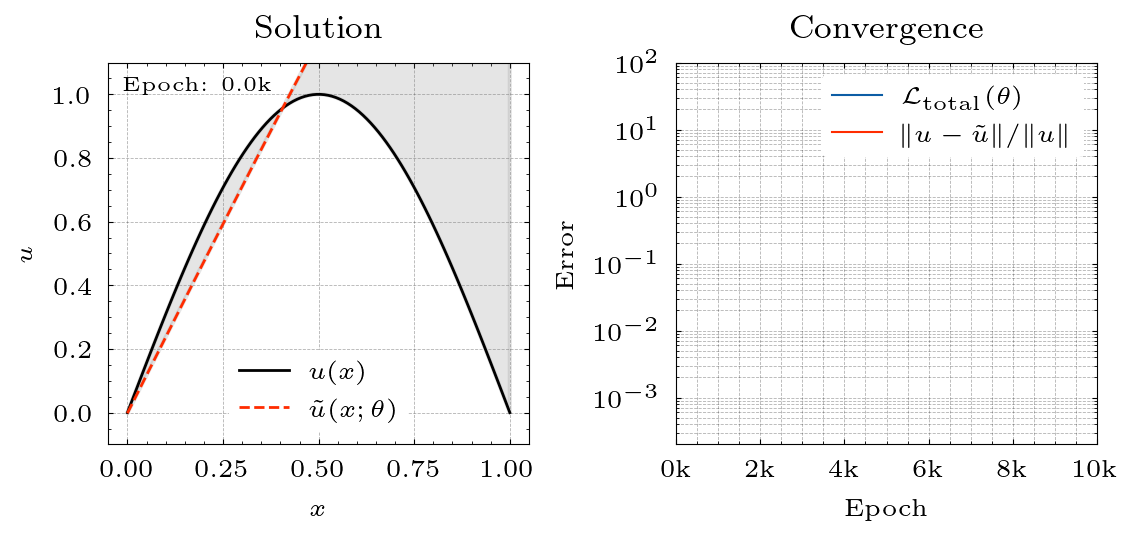

In [ ]:
# Animation
def subsample_steps(steps, sub_factors):
    section_ends = [int(len(steps) * i / len(sub_factors)) for i in range(1, len(sub_factors) + 1)]
    return list(chain.from_iterable([range(section_ends[i-1] if i > 0 else 0, section_ends[i], factor) 
                                      for i, factor in enumerate(sub_factors)]))

# Prepare frame indices
frame_steps = subsample_steps(list(range(len(history['Epoch']))), [1, 2, 3, 4, 5, 5, 5])
fps = 10
print(f"Animation: {len(frame_steps)} frames at {fps} fps = {len(frame_steps)/fps:.1f}s")

fig_anim, axes_anim, artists_anim = init_figure()
anim = FuncAnimation(fig_anim, lambda i: update_plot(frame_steps[i], artists_anim), 
                     frames=len(frame_steps), repeat=True, interval=100, blit=True)
plt.show()

# Uncomment to save:
# anim.save(os.path.join(results_folder, 'images', 'pinn_training.gif'), writer='pillow', fps=fps)

## DeepXDE Implementation (Compact)

Compiling model...
'compile' took 0.015290 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [4.78e+01, 1.59e-04]    [4.91e+01, 1.59e-04]    [1.01e+00]    
1000      [9.48e-04, 3.69e-06]    [7.60e-04, 3.69e-06]    [1.70e-03]    
2000      [5.16e-04, 5.84e-07]    [4.01e-04, 5.84e-07]    [7.31e-04]    
3000      [1.67e-04, 1.52e-07]    [1.18e-04, 1.52e-07]    [3.87e-04]    
4000      [4.77e-05, 1.08e-08]    [3.56e-05, 1.08e-08]    [1.06e-04]    
5000      [4.09e-05, 3.05e-09]    [3.28e-05, 3.05e-09]    [6.70e-05]    
6000      [5.51e-05, 1.01e-06]    [4.70e-05, 1.01e-06]    [1.11e-03]    
7000      [3.33e-05, 5.78e-10]    [2.71e-05, 5.78e-10]    [3.48e-05]    
8000      [9.49e-05, 3.83e-06]    [8.81e-05, 3.83e-06]    [2.00e-03]    
9000      [5.42e-05, 9.30e-07]    [4.94e-05, 9.30e-07]    [1.99e-03]    
10000     [7.09e-04, 3.09e-05]    [6.97e-04, 3.09e-05]    [5.34e-03]    

Best model at step 7000:
  train loss: 3.33e-05
  test loss: 2.71e-05
  test metric: [3.48e-05]

'train'

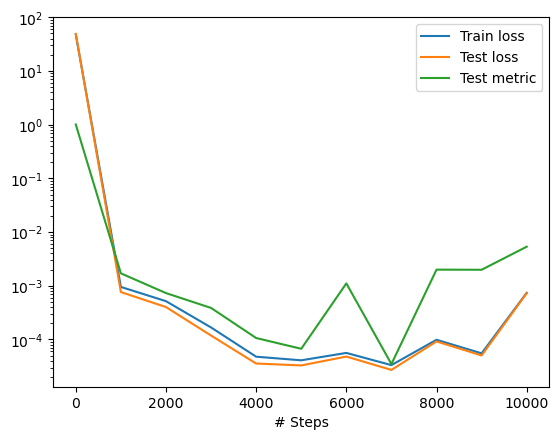

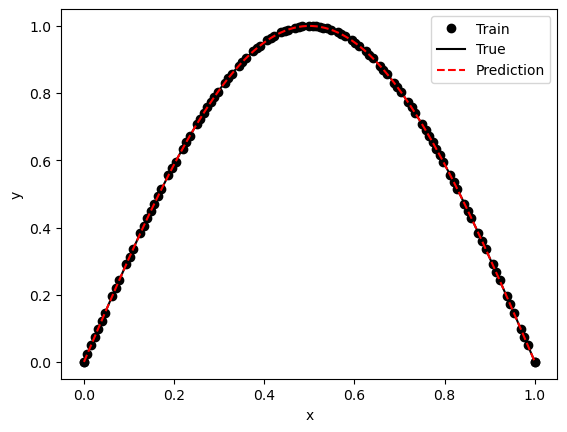

In [ ]:
import deepxde as dde
import numpy as np
import jax.numpy as jnp

# Manufactured solution and source term
u_exact = lambda x: np.sin(np.pi * x)
f_source = lambda x: jnp.pi**2 * jnp.sin(jnp.pi * x)

# PDE: -u_xx = π²sin(πx)
def pde(x, y):
    dy_xx, _ = dde.grad.hessian(y, x)
    return -dy_xx - f_source(x)

# Geometry and BCs
geom = dde.geometry.Interval(0, 1)
bc = dde.icbc.DirichletBC(geom, u_exact, lambda x, on_boundary: on_boundary)

data = dde.data.PDE(geom, pde, bc, 100, 2, solution=u_exact, num_test=100)
net = dde.nn.FNN([1, 32, 32, 1], "tanh", "Glorot normal")

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=False, isplot=True)